# Importando bibliotecas necessárias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # para dividir o dataset em test e train
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.groupby("Class").count() #para visualizar exatamente quantos temos de cada classe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


Podemos ver que as classes estão bastante desbalanceadas, vamos observer isso em um gráfico para ficar mais clara essa diferença

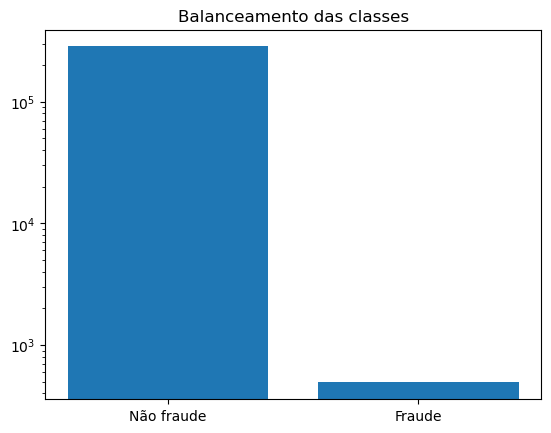

In [7]:
classes = df['Class'].value_counts()
plt.bar(classes.index, classes.values)
plt.xticks([0,1], labels=['Não fraude', 'Fraude'])
plt.title('Balanceamento das classes')
plt.yscale('log') # para ficar melhor a visualização da classe das fraudes decidi colocar uma escala logarítmica
plt.show()

# Verificando Outliers

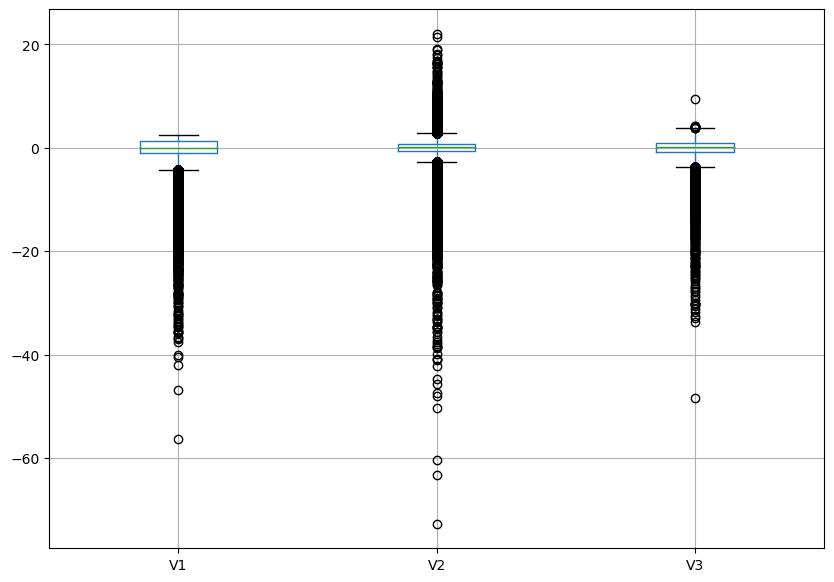

In [8]:
colunas = df.iloc[:,1:4]
plt.figure(figsize=(10,7))
colunas.boxplot()
plt.show()

Também é possível ver uma quantidade muito grande de outliers, por conta disso decidi testar primeiro um modelo de árvore de decisão por geralmente serem mais robustos a outliers

# Vou divir o dataset em treino e teste para evitar overfitting

In [9]:
x = df.iloc[:,1:29]
y = df.iloc[:,30]
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2, random_state=42)

# Modelo ExtraTreeClassifier

Primeiro vamos atribuir pesos diferentes para as classes por conta do grande desbalanceamento entre elas

In [86]:
class_weight = {0:1, 1:600}
# atribuimos peso 1 para a classe 0 e peso 1000 para a classe 1

In [87]:
modelo_etc = ExtraTreesClassifier(n_estimators=200, max_depth=50, min_samples_split=5, class_weight=class_weight, random_state=42)
modelo_etc.fit(x_treino, y_treino)
# Cheguei nesses hiperparametros após vários testes e foram os que deram o melhor resultado combinados

ExtraTreesClassifier(class_weight={0: 1, 1: 600}, max_depth=50,
                     min_samples_split=5, n_estimators=200, random_state=42)

In [88]:
etc_predict = modelo_etc.predict(x_teste)

Verificando como o modelo se saiu com as predições

In [89]:
accuracy_etc = accuracy_score(y_teste, etc_predict)

Como temos um dataset extremamente desbalanceado, uma accuracy alta não significa, necessáriamente, que o modelo foi bem, por isso vou calcular outras métricas para avaliar o sucesso do modelo

Equanto a accuracy mede a capacidade do modelo de classificar as instâncias em todas as classes, o recall indica a proporção de instâncias positivas que foram corretamente identificadas em relação ao total de positivas

In [90]:
recall_etc= recall_score(y_teste, etc_predict, pos_label=1)
# nesse caso quero avaliar a capacidade do modelo de identificar as fraudes que são o valor de classe 1

Outra forma de termos certeza do desempenho do modelo em relação a identificação das transações fraudulentas é fazer a validação cruzada.
Com a validação cruzada vamos dividir o dataset em folds, usando 1 deles para treinar o modelo e os outros para testar

In [91]:
cross_val_etc = cross_val_score(modelo_etc, x, y, cv=5, scoring='recall')
# nesse caso o cv=5 é a quantidade de folds usados
# e vamos usar o recall pois queremos medir a eficiência em identificar as fraudes

Já o f1-score é uma métrica muito usada para avaliar modelos de classificação pois ele combina o recall e a precisão do modelo

In [92]:
f1_etc = f1_score(y_teste, etc_predict)

Podemos agora analisar o desempenho do modelo:

In [93]:
print(f'Accuracy_etc: {accuracy_etc*100}%')
print(f'Recall_etc: {recall_etc*100}%')
print(f'Validação Cruzada: {cross_val_etc*100}%')
print(f'F1-score_etc: {f1_etc*100}%')

Accuracy_etc: 99.96137776061234%
Recall_etc: 80.61224489795919%
Validação Cruzada: [88.88888889 79.7979798  68.36734694 80.6122449  68.36734694]%
F1-score_etc: 87.77777777777777%


Ainda é possível obter resultados superiores, por isso irei testar outros modelos

# GradientBoostingClassifier

O GradientBoosting combina arvores de decisão em série de modo que a cada árvore é treinada para corrigir os erros da anterior, dessa forma ele é conhecido por gerar modelos mais precisos que o ExtraTreeClassifier, porém o modelo costuma demorar mais para ser treinado

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight # para balancear os dados

In [39]:
modelo_gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=50, random_state=42)

In [40]:
# calculando o sample weight para o treinamento
sample_weight = compute_sample_weight(class_weight='balanced', y=y_treino)

In [41]:
# treinamento do modelo
modelo_gb.fit(x_treino, y_treino, sample_weight=sample_weight)

GradientBoostingClassifier(max_depth=50, n_estimators=200, random_state=42)

In [42]:
# Teste de modelo
gb_predict = modelo_gb.predict(x_teste)

Vamos calcular todas as métricas desse modelo também

In [43]:
accuracy_gb = accuracy_score(y_teste, gb_predict)
recall_gb = recall_score(y_teste, gb_predict, pos_label=1)
cross_val_gb = cross_val_score(modelo_etc, x, y, cv=5, scoring='recall')
f1_gb = f1_score(y_teste, gb_predict)

Verificando o desempenho desse modelo

In [44]:
print(f'Accuracy_gb: {accuracy_gb*100}%')
print(f'Recall_gb: {recall_gb*100}%')
print(f'Validação Cruzada: {cross_val_gb*100}%')
print(f'F1-score_gb: {f1_gb*100}%')

Accuracy_gb: 99.91573329588147%
Recall_gb: 73.46938775510205%
Validação Cruzada: [85.85858586 78.78787879 68.36734694 80.6122449  68.36734694]%
F1-score_gb: 74.99999999999999%


# MLPClassifier

Esse modelo já é um modelo de rede neural

In [45]:
!pip install imblearn

Para fazer o balanceamento das classes antes de treinar a rede neural, eu optei por usar uma técnica de oversampling, smote, que cria exemplos sintéticos da classe de menor quantidade

In [46]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

In [47]:
# criando uma instância smote
smote=SMOTE(random_state=42)

In [48]:
# aplicando o smote
x_treino_balanceado, y_treino_balanceado = smote.fit_resample(x_treino, y_treino)

In [49]:
modelo_mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=1000, random_state=42)
modelo_mlp.fit(x_treino_balanceado, y_treino_balanceado)

MLPClassifier(hidden_layer_sizes=2, max_iter=1000, random_state=42)

In [50]:
mlp_predict = modelo_mlp.predict(x_teste)

In [51]:
accuracy_mlp = accuracy_score(y_teste, mlp_predict)
recall_mlp = recall_score(y_teste, mlp_predict, pos_label=1)
cross_val_mlp = cross_val_score(modelo_mlp, x, y, cv=5, scoring='recall')
f1_mlp = f1_score(y_teste, mlp_predict)

In [52]:
print(f'Accuracy_mlp: {accuracy_mlp*100}%')
print(f'Recall_mlp: {recall_mlp*100}%')
print(f'Validação Cruzada: {cross_val_mlp*100}%')
print(f'F1-score_mlp: {f1_mlp*100}%')

Accuracy_mlp: 97.01730978547101%
Recall_mlp: 90.81632653061224%
Validação Cruzada: [86.86868687 83.83838384 69.3877551  85.71428571 75.51020408]%
F1-score_mlp: 9.4832179009057%


O grande problema desse modelo foi justamente o F1-score muito baixo, o que pode significar que o modelo está tendo dificuldade de predição de alguma classe

# VotingClassifier

Para tentar conseguir resultados melhores, vou testar técnicas de ensemble para juntar os modelos.
Primeiro vou utilizar uma técnica de Voting com parametro 'soft', nesse caso, cada modelo fornece uma probabilidade para cada classe e a classe com maior probabilidade é escolhida como predição final

In [94]:
from sklearn.ensemble import VotingClassifier

In [95]:
voting = VotingClassifier(estimators=[('etc', modelo_etc), ('mlp', modelo_mlp)], voting='soft')

In [96]:
voting.fit(x_treino, y_treino)

VotingClassifier(estimators=[('etc',
                              ExtraTreesClassifier(class_weight={0: 1, 1: 600},
                                                   max_depth=50,
                                                   min_samples_split=5,
                                                   n_estimators=200,
                                                   random_state=42)),
                             ('mlp',
                              MLPClassifier(hidden_layer_sizes=2, max_iter=1000,
                                            random_state=42))],
                 voting='soft')

In [97]:
voting_predict = voting.predict(x_teste)

In [98]:
accuracy_voting = accuracy_score(y_teste, voting_predict)
recall_voting = recall_score(y_teste, voting_predict, pos_label=1)
cross_val_voting = cross_val_score(voting, x, y, cv=5, scoring='recall')
f1_voting = f1_score(y_teste, voting_predict)

In [99]:
print(f'Accuracy_voting: {accuracy_voting*100}%')
print(f'Recall_voting: {recall_voting*100}%')
print(f'Validação Cruzada: {cross_val_voting*100}%')
print(f'F1-score_voting: {f1_voting*100}%')

Accuracy_voting: 99.9385555282469%
Recall_voting: 79.59183673469387%
Validação Cruzada: [86.86868687 83.83838384 68.36734694 85.71428571 75.51020408]%
F1-score_voting: 81.67539267015708%


# Stacking

O Stacking é um algoritmo de aprendizado de máquina em que vários modelos são treinados em um conjunto de dados e as suas saídas são usadas como entrada para um modelo de nível superior que aprende a prever o resultado final.

In [100]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict

In [61]:
modelos_base=[('et', modelo_etc), ('gb', modelo_gb)]

In [62]:
modelo_meta = MLPClassifier(hidden_layer_sizes=(2), max_iter=1000, random_state=42)

In [63]:
stacking = StackingClassifier(estimators=modelos_base, final_estimator=modelo_meta)

In [68]:
stacking_predict = cross_val_predict(stacking, x_treino, y_treino, cv=5, method='predict_proba')

In [69]:
stacking.fit(x_treino, y_treino)
stacking_predict = stacking.predict(x_teste)

In [ ]:
accuracy_stacking = accuracy_score(y_teste, stacking_predict)
recall_stacking = recall_score(y_teste, stacking_predict, pos_label=1)
cross_val_stacking = cross_val_score(stacking, x, y, cv=5, scoring='recall')
f1_stacking = f1_score(y_teste, stacking_predict)

In [ ]:
print(f'Accuracy_stacking: {accuracy_stacking*100}%')
print(f'Recall_stacking: {recall_stacking*100}%')
print(f'Validação Cruzada: {cross_val_stacking*100}%')
print(f'F1-score_stacking: {f1_stacking*100}%')  

# Stacking

In [101]:
modelos_base1=[('et', modelo_etc), ('mlp', modelo_mlp)]

In [102]:
modelo_meta1 = MLPClassifier(hidden_layer_sizes=(2), max_iter=1000, random_state=42)

In [103]:
stacking1 = StackingClassifier(estimators=modelos_base, final_estimator=modelo_meta)

In [104]:
stacking_predict1 = cross_val_predict(stacking1, x_treino, y_treino, cv=5, method='predict_proba')

In [105]:
stacking1.fit(x_treino, y_treino)
stacking_predict1 = stacking1.predict(x_teste)

In [106]:
accuracy_stacking1 = accuracy_score(y_teste, stacking_predict1)
recall_stacking1 = recall_score(y_teste, stacking_predict1, pos_label=1)
cross_val_stacking1 = cross_val_score(stacking1, x, y, cv=5, scoring='recall')
f1_stacking1 = f1_score(y_teste, stacking_predict1)

In [107]:
print(f'Accuracy_stacking: {accuracy_stacking1*100}%')
print(f'Recall_stacking: {recall_stacking1*100}%')
print(f'Validação Cruzada: {cross_val_stacking1*100}%')
print(f'F1-score_stacking: {f1_stacking1*100}%')

Accuracy_stacking: 99.96137776061234%
Recall_stacking: 79.59183673469387%
Validação Cruzada: [77.77777778 76.76767677 63.26530612 74.48979592 61.2244898 ]%
F1-score_stacking: 87.64044943820225%


# Conclusão

Com base nos resultados obtidos, podemos concluir que o modelo Extra Trees apresentou o melhor desempenho entre os modelos individuais. No entanto, ao utilizarmos o ensemble Stacking com os modelos Extra Trees, Gradient Boosting e MLP, conseguimos um F1-score de 81.05%.

Além disso, é importante ressaltar que, para problemas de detecção de fraudes em cartões de crédito, a métrica de recall é de extrema importância. Nesse sentido, todos os modelos apresentaram um recall razoável, porém o MLP apresentou melhores resultados.

Por fim, é importante destacar que a escolha do modelo e técnica de ensemble deve ser feita com base nas necessidades do problema em questão e nas métricas que se deseja maximizar. É possível que em outras bases de dados ou problemas, os resultados sejam diferentes e outros modelos ou técnicas de ensemble apresentem melhor desempenho.